A3: Accessing and processing Sentinel 1 data

In this notebook, I demonstrate how to access Sentinel-1 data from Copernicus Data Space Ecosystem using the [STAC API](https://documentation.dataspace.copernicus.eu/APIs/STAC.html) through the [pystac-client](https://stacspec.org/en/tutorials/1-read-stac-python/) library. 

This represents the first step in the Pysarflow group's workflow, aimed at enabling users to easily integrate Sentinel-1 data directly within the SAR processing pipelines.

In [1]:
#confirm virtual env for processing

import sys
sys.executable

'/Users/omowonuolaakintola/Software/anaconda3/envs/sar_processing/bin/python'

In [6]:
# Connect to the Copernicus Data STAC API using pystac-client

from pystac_client import Client

api_url = "https://catalogue.dataspace.copernicus.eu/stac"

client = Client.open(api_url)

/Users/omowonuolaakintola/Software/anaconda3/envs/sar_processing/lib/python3.13/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [7]:
# See available collections in the api

collections = client.get_collections()

for collection in collections:
  print(collection)

<CollectionClient id=SUOMI-NPP>
<CollectionClient id=COP-DEM>
<CollectionClient id=LANDSAT-5>
<CollectionClient id=S2GLC>
<CollectionClient id=TERRAAQUA>
<CollectionClient id=SMOS>
<CollectionClient id=LANDSAT-7>
<CollectionClient id=GLOBAL-MOSAICS>
<CollectionClient id=SENTINEL-5P>
<CollectionClient id=SENTINEL-1-RTC>
<CollectionClient id=CCM>
<CollectionClient id=ENVISAT>
<CollectionClient id=LANDSAT-8-ESA>
<CollectionClient id=SENTINEL-1>
<CollectionClient id=SENTINEL-2>
<CollectionClient id=SENTINEL-3>
<CollectionClient id=SENTINEL-6>
<CollectionClient id=CLMS>
<CollectionClient id=LANDSAT-8>
<CollectionClient id=LANDSAT-9>
<CollectionClient id=TERRA>


In [8]:
# Get more information about S1 collection

s1_collection = client.get_collection("SENTINEL-1")
s1_collection

<CollectionClient id=SENTINEL-1>

In [9]:
# Search the collection

result = client.search(
    collections= ['SENTINEL-1'],
    bbox = [34.79083, 3.67000, 34.90722, 3.78611],
    datetime=['2022-01-01T00:00:00Z', '2022-12-30T00:00:00Z'],
    #limit = 15

)

In [10]:
# Check the list of all the items

items = result.item_collection()
print(len(items))

for item in items:
    print(item)

109
<Item id=S1A_IW_RAW__0SDV_20220105T155755_20220105T155822_041328_04E9C8_177F.SAFE>
<Item id=S1A_IW_RAW__0SDV_20220105T155755_20220105T155822_041328_04E9C8_5EED.SAFE>
<Item id=S1A_IW_GRDH_1SDV_20220105T155759_20220105T155823_041328_04E9C8_8DBC.SAFE>
<Item id=S1A_IW_SLC__1SDV_20220505T155758_20220505T155823_043078_0524E9_4489.SAFE>
<Item id=S1A_IW_GRDH_1SDV_20220117T155758_20220117T155822_041503_04EF7D_CA9B.SAFE>
<Item id=S1A_IW_RAW__0SDV_20220117T155754_20220117T155822_041503_04EF7D_42B2.SAFE>
<Item id=S1A_IW_RAW__0SDV_20220129T155754_20220129T155821_041678_04F56B_3F22.SAFE>
<Item id=S1A_IW_GRDH_1SDV_20220129T155758_20220129T155822_041678_04F56B_C5BF_COG.SAFE>
<Item id=S1A_IW_GRDH_1SDV_20220117T155758_20220117T155822_041503_04EF7D_F2D4_COG.SAFE>
<Item id=S1A_IW_GRDH_1SDV_20220105T155759_20220105T155823_041328_04E9C8_E1D6_COG.SAFE>
<Item id=S1A_IW_GRDH_1SDV_20220105T155759_20220105T155823_041328_04E9C8_0FF1_COG.SAFE>
<Item id=S1A_IW_RAW__0SDV_20220411T155754_20220411T155822_042728_05

In [12]:
# Only print items that are Single Look Complex (SLC)
slc_items = [item for item in items if "SLC" in item.id]

print(f"SLC items: {len(slc_items)}")
for item in slc_items:
    print(item.id)

SLC items: 23
S1A_IW_SLC__1SDV_20220505T155758_20220505T155823_043078_0524E9_4489.SAFE
S1A_IW_SLC__1SDV_20220210T155756_20220210T155821_041853_04FB87_1BD2.SAFE
S1A_IW_SLC__1SDV_20220129T155757_20220129T155822_041678_04F56B_A367.SAFE
S1A_IW_SLC__1SDV_20220318T155756_20220318T155821_042378_050D7C_37BB.SAFE
S1A_IW_SLC__1SDV_20221101T155806_20221101T155831_045703_057747_C3A0.SAFE
S1A_IW_SLC__1SDV_20220704T155802_20220704T155827_043953_053F2D_FAC0.SAFE
S1A_IW_SLC__1SDV_20220809T155804_20220809T155829_044478_054EC4_4C86.SAFE
S1A_IW_SLC__1SDV_20221219T155804_20221219T155829_046403_058F13_D54E.SAFE
S1A_IW_SLC__1SDV_20220117T155757_20220117T155822_041503_04EF7D_AB98.SAFE
S1A_IW_SLC__1SDV_20220117T155757_20220117T155822_041503_04EF7D_AB98.SAFE
S1A_IW_SLC__1SDV_20220210T155756_20220210T155821_041853_04FB87_1BD2.SAFE
S1A_IW_SLC__1SDV_20221101T155806_20221101T155831_045703_057747_C3A0.SAFE
S1A_IW_SLC__1SDV_20221113T155806_20221113T155831_045878_057D33_76D6.SAFE
S1A_IW_SLC__1SDV_20220423T155757_2022

In [13]:
# Retrieve actual scene with the items returned

#Lets look at item 1

item = slc_items[4]
#print(item.datetime)
#print(item.geometry)
print(item.properties)

{'timeliness': 'Fast-24h', 'orbitNumber': 45703, 'sliceNumber': 11, 'productClass': 'S', 'orbitDirection': 'ASCENDING', 'operationalMode': 'IW', 'processingLevel': 'LEVEL1', 'swathIdentifier': 'IW1 IW2 IW3', 'platformShortName': 'SENTINEL-1', 'instrumentShortName': 'SAR', 'relativeOrbitNumber': 131, 'polarisationChannels': 'VV&VH', 'platformSerialIdentifier': 'A', 'datetime': '2022-11-01T15:58:06.371000Z', 'end_datetime': '2022-11-01T15:58:31.527000Z', 'start_datetime': '2022-11-01T15:58:06.371000Z', 'productType': 'IW_SLC__1S'}


In [14]:
# print the asset keys 

print(item.assets.keys())

dict_keys(['QUICKLOOK', 'PRODUCT'])


In [90]:
print(item.assets['PRODUCT'].href)

https://catalogue.dataspace.copernicus.eu/odata/v1/Products(51fe8727-3771-5a2d-879a-2c1276aff7b8)/$value


In [92]:
item_url = item.assets['PRODUCT'].href
filename = item_url.split('/')[-2]

print(filename)
print(item_url)

Assets(0bf941bf-8c8d-489f-8f5e-5f27694b0a27)
https://catalogue.dataspace.copernicus.eu/odata/v1/Assets(0bf941bf-8c8d-489f-8f5e-5f27694b0a27)/$value


In [ ]:
# Get access to the token 

import requests
import os

username = input("Copernicus Username:")
password = input("Copernicus Password:")

# Token endpoint
auth_url = "https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token"

# Headers for form encoding
headers = {
    "Content-Type": "application/x-www-form-urlencoded"
}

# Request body
data = {
    'client_id': 'cdse-public', 
    'username': username,
    'password': password,
    'grant_type': 'password'
}

# Get token
response = requests.post(auth_url, data=data)
response.raise_for_status()
access_token = response.json()["access_token"]

print('access token acquired')

print(response)

/Users/omowonuolaakintola/Software/anaconda3/envs/sar_processing/lib/python3.13/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [ ]:
# Download and save it locally 

import requests

# Make sure access_token is defined
#access_token = "your_access_token"  # Replace with your actual access token

filename = "S1_product.zip"
save_dir = 'data'
os.makedirs(save_dir, exist_ok=True)
local_path = os.path.join(save_dir, filename)
print(local_path)

url = f"https://download.dataspace.copernicus.eu/odata/v1/Products(51fe8727-3771-5a2d-879a-2c1276aff7b8)/$value" # file is large, recommend not to download for testing

headers = {"Authorization": f"Bearer {access_token}"}

# Create a session and update headers
session = requests.Session()
session.headers.update(headers)

# Perform the GET request
response = session.get(url, stream=True)

# Check if the request was successful
if response.status_code == 200:
    with open(local_path, "wb") as file:
        for chunk in response.iter_content(chunk_size=8192):
            if chunk:  # filter out keep-alive new chunks
                file.write(chunk)
else:
    print(f"Failed to download file. Status code: {response.status_code}")
    print(response.text)

The second part of this notebook focuses on exploring data using the sarpy library. While the library is not a full processing engine, it helps with reading raw complex data and provide quick visualization of the phase and magnitude data. 

It was developed to work specifically with raw SAR data or complex data like the SLC from Sentinel-1.

https://sarpy.readthedocs.io/en/latest/io/complex/sentinel.html

Note: I added the sarpy bit for testing purposes and sake of the assignment, in the true sense it is important to first preprocess the SAR images before any further analysis is conducted. The data does not have any location information so really hard to make sense of or compare the output.


In [80]:
# Import the Sentinel-1 reader
from sarpy.io.complex.sentinel import SentinelReader

# Point to the .SAFE folder
manifest_path = os.path.join("data", "S1A_SLC.SAFE", "manifest.safe")

# Load the scene
reader = SentinelReader(manifest_path)

print(reader)

# Read a 1024×1024 chip from the top-left corner
chip = reader.read_chip(1024, 1024)

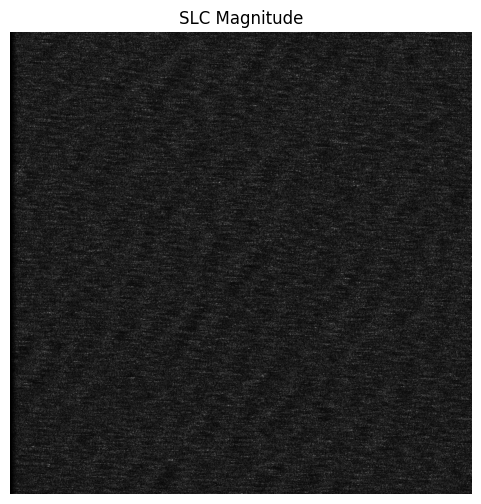

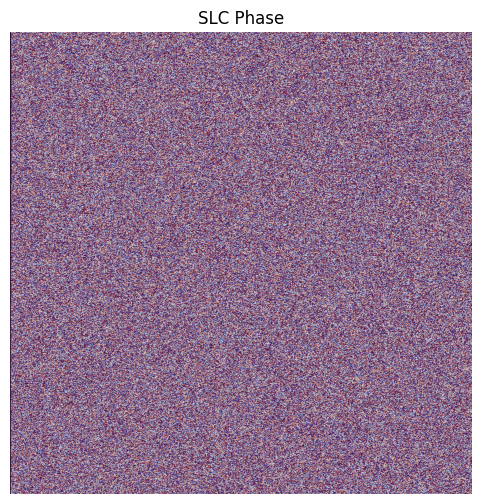

In [81]:
#  Visualize magnitude and phase
import numpy as np
import matplotlib.pyplot as plt

magnitude = np.abs(chip)

plt.figure(figsize=(6, 6))
plt.imshow(magnitude, cmap='gray')
plt.title("SLC Magnitude")
plt.axis("off")
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(np.angle(chip), cmap='twilight')
plt.title("SLC Phase")
plt.axis("off")
plt.show()

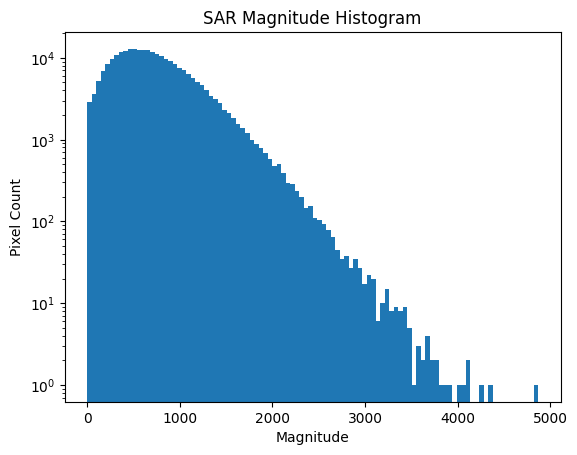

In [62]:
# Magnitude histogram

import matplotlib.pyplot as plt

plt.hist(magnitude.flatten(), bins=100, log=True)
plt.title("SAR Magnitude Histogram")
plt.xlabel("Magnitude")
plt.ylabel("Pixel Count")
plt.show()

In [46]:
# Extracting metadata from the data

print("Polarization channels:", reader.get_sicd_polarizations())

Polarization channels: ('V:V', 'V:V', 'V:V', 'V:V', 'V:V', 'V:V', 'V:V', 'V:V', 'V:V', 'V:V', 'V:V', 'V:V', 'V:V', 'V:V', 'V:V', 'V:V')


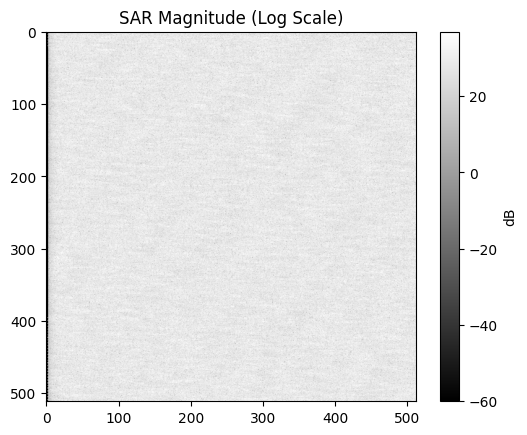

In [63]:
log_mag = 10 * np.log10(magnitude + 1e-6)

plt.imshow(log_mag, cmap='gray')
plt.title("SAR Magnitude (Log Scale)")
plt.colorbar(label="dB")
plt.show()

Found 5751 connected regions


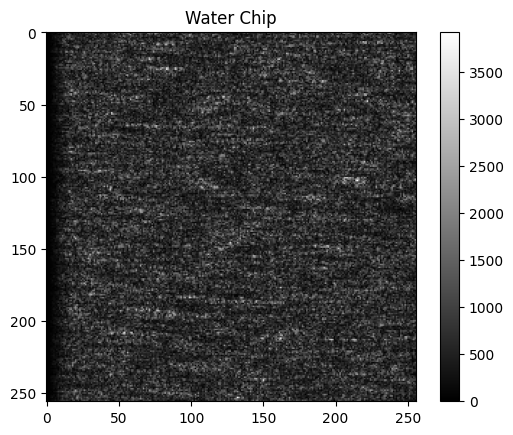

In [75]:
# Exploring SAR magnitude, assuming that darker magnitudes are water values

from scipy.ndimage import label, find_objects
import matplotlib.pyplot as plt
import numpy as np

# Create water mask
water_mask = magnitude < 800  

# Label connected components
labeled, num_features = label(water_mask)
print("Found", num_features, "connected regions")

# Get bounding boxes for each region
regions = find_objects(labeled)

# Flag to track success
chip_found = False

# Loop through candidate regions
for region in regions:
    if region is None:
        continue  # Skip invalid

    r_slice, c_slice = region
    height = r_slice.stop - r_slice.start
    width = c_slice.stop - c_slice.start

    if height >= 256 and width >= 256:
        # Extract chip
        water_chip = magnitude[r_slice.start:r_slice.start+256,
                               c_slice.start:c_slice.start+256]

        chip_found = True
        break  # Stop after first valid chip

if chip_found:
    plt.imshow(water_chip, cmap="gray")
    plt.title("Water Chip")
    plt.colorbar()
    plt.show()
else:
    print(" No large enough water patch found. Try a bigger chip or adjust threshold.")